<a href="https://colab.research.google.com/github/ekaekaw/klarifikasiteksUAS/blob/main/klarifikasi_teks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Langkah 1: Import Library yang Diperlukan
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Langkah 2: Memuat dan Mempersiapkan Data
max_features = 10000  # Jumlah kata yang akan digunakan (berdasarkan frekuensi)
max_len = 500  # Panjang maksimal urutan kata

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Menampilkan beberapa contoh data teks sebelum di-tokenisasi
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([index_word.get(i - 3, '?') for i in encoded_review])

print("Contoh data pelatihan (sebelum tokenisasi):")
for i in range(10):
    print(f"Review {i+1}: {decode_review(x_train[i])}")
    print(f"Label {i+1}: {'Positive' if y_train[i] == 1 else 'Negative'}\n")

1641221/1641221 [==============================] - 0s 0us/step
Contoh data pelatihan (sebelum tokenisasi):
Review 1: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection

In [ ]:
# Langkah 3: Membangun Model CNN
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Langkah 4: Melatih Model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/10
313/313 [==============================] - 135s 428ms/step - loss: 0.4746 - accuracy: 0.7514 - val_loss: 0.2870 - val_accuracy: 0.8846
Epoch 2/10
313/313 [==============================] - 133s 426ms/step - loss: 0.2015 - accuracy: 0.9237 - val_loss: 0.2679 - val_accuracy: 0.8928
Epoch 3/10
313/313 [==============================] - 140s 448ms/step - loss: 0.0703 - accuracy: 0.9800 - val_loss: 0.2915 - val_accuracy: 0.9002
Epoch 4/10
313/313 [==============================] - 137s 437ms/step - loss: 0.0174 - accuracy: 0.9962 - val_loss: 0.3300 - val_accuracy: 0.9030


In [ ]:
# Langkah 5: Evaluasi Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 42s 54ms/step - loss: 0.3469 - accuracy: 0.8942
Test Accuracy: 0.8942000269889832


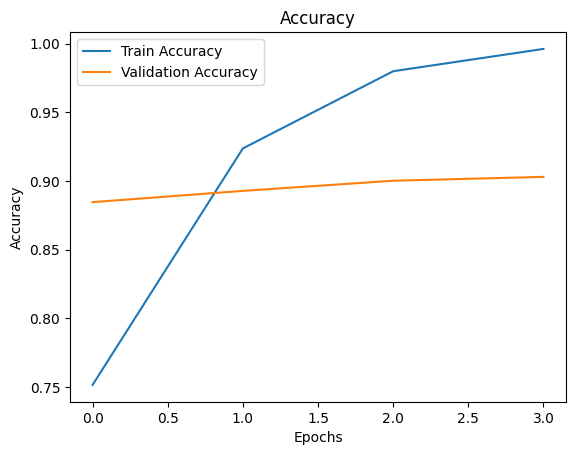

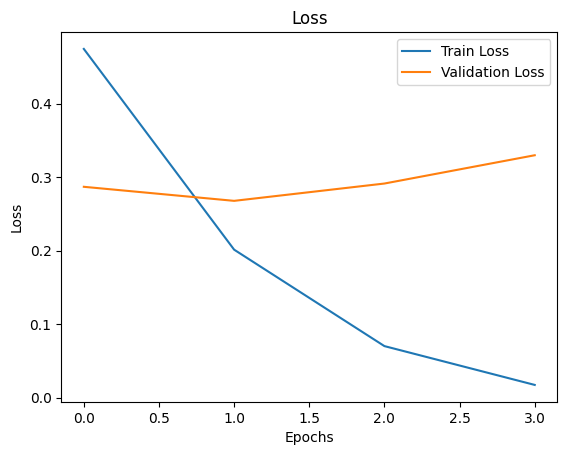

In [ ]:
# Plotting Accuracy and Loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()